In [2]:
import numpy as np
import matplotlib.pyplot as plt

#ファイル読み込み
x1 = np.loadtxt('dat1.txt')
x2 = np.loadtxt('dat2.txt')

#平均0にする
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x = [x1,x2]

#共分散行列を求める
xcov = np.cov(x,rowvar = 1,bias = 1)
mx = np.asmatrix(xcov)

#固有値計算、白色化
t,E = np.linalg.eig(mx)
tv = 1 / (t ** (1/2) )
Dv = np.diag(tv)
Dv = np.asmatrix(Dv)
V = E * Dv * E.T
z = V * x

In [3]:
#正規化
def normalize(vec):
    vec_norm = np.linalg.norm(vec)
    if vec.sum()<0:
        vec *= -1
    return vec / vec_norm

#変換
def convert(w,z):
    step1 = np.asarray(z) * (np.asarray(w.T * z)**3)
    step2 = np.mean(step1,axis=1)
    step3 = np.asmatrix(step2).T - 3*w
    return np.asarray(step3)

In [4]:
#尖度を最大化
W = np.empty((0,2))
for i in range(2):
    w = np.random.rand(2,1)
    w = normalize(w)
    while True:
        tmp = w
        w = convert(w,z)
        w = normalize(w)
        if np.linalg.norm(w-tmp)<0.000001:
            W = np.concatenate((W,w.T),axis=0)
            break

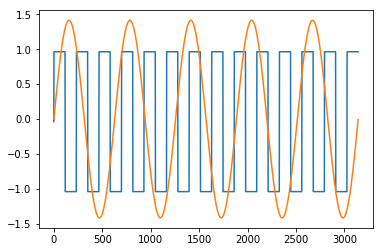

In [5]:
y = W * z
y = np.asarray(y)
plt.plot(y[0])
plt.plot(y[1])
#数回に一度成功

In [257]:
#二度と実行しなければこのまま固定
yconst = y

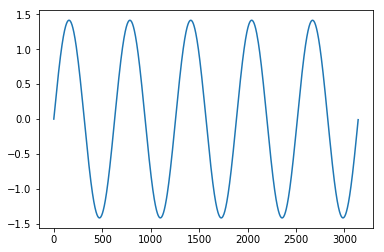

In [260]:
plt.plot(yconst[0])

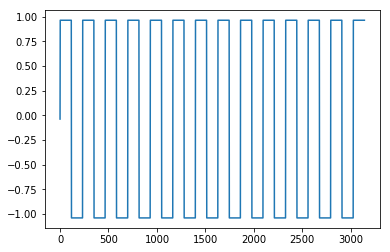

In [261]:
plt.plot(yconst[1])

In [6]:
W.shape

(2, 2)

In [7]:
z.shape

(2, 3142)

In [8]:
mx

matrix([[ 0.53433146, -0.27433077],
        [-0.27433077,  0.37435198]])

In [9]:
x

[array([-0.02606608,  0.67693387,  0.67993352, ...,  0.66615683,
         0.66915616,  0.67215597]),
 array([ 0.01861891, -0.47638118, -0.47138176, ..., -0.49434291,
        -0.48934403, -0.48434434])]